In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 

In [2]:
df_unweighted = pd.read_csv('../combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('../combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
df_dir = pd.read_csv('../combined_final_weighted_groupedby.csv')
df_dir

,node_start,node_end,weight
0,Albania,Bahamas,4.0
1,Algeria,British Virgin Islands,2.0
2,Algeria,United Kingdom,2.0
3,Algeria,United States,1.0
4,Andorra,Bahamas,52.0
...,...,...,...
2835,Zimbabwe,Hong Kong,3.0
2836,Zimbabwe,Jersey,1.0
2837,Zimbabwe,Panama,6.0
2838,Zimbabwe,Russia,2.0


In [5]:
#plot the unweighted graph (try unweighted first)
g = ig.Graph.TupleList(df_dir.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})


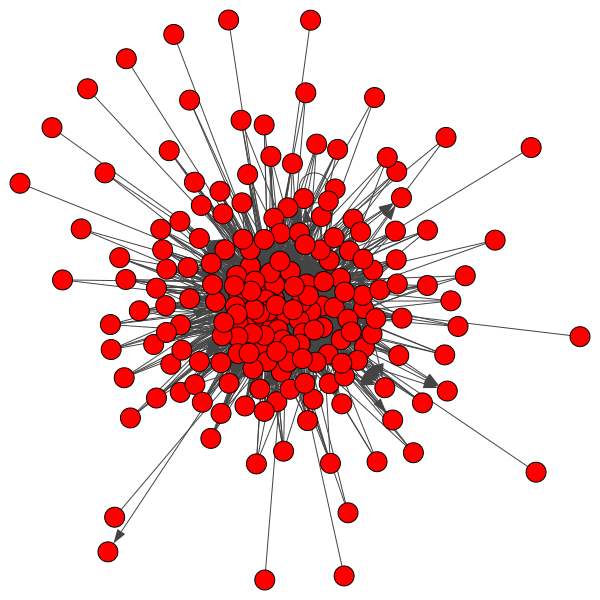

In [6]:
ig.plot(g)

In [7]:
g.diameter()

4

In [8]:
len(g.vs.indices)

196

In [9]:
#g.vs.indices
df_dir['node_start'].value_counts()

Hong Kong                    60
United States                55
China                        53
Taiwan                       53
Singapore                    52
                             ..
Norfolk Island                1
Central African Republic      1
Albania                       1
Sint Maarten (Dutch part)     1
Zambia                        1
Name: node_start, Length: 190, dtype: int64

In [10]:
uni =df_dir['node_start'].unique()

In [11]:
len(uni)

190

In [12]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 2, {'name': 'Algeria'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 4, {'name': 'United Kingdom'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 5, {'name': 'United States'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 6, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 7, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 8, {'name': 'Cook Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 9, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 10, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 11, {'n

In [13]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'avg_betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [14]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    pr = []
    auth = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #try pagerank 
        page = g.pagerank(directed=True, weights='weight')
        page = sum(page)/max(len(page),1)
        pr.append(page)
        
        #authority score normalised by default
        kleinberg = g.authority_score(weights='weight')
        kleinberg = sum(kleinberg)/max(len(kleinberg),1)
        auth.append(kleinberg)
        
        #try in-degree
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'avg_weighted_betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
    return(df)

In [15]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,74.107692,0.01,4.0,-0.470685,14.420513,0.073951,1.960455
1,2,73.984536,0.01,4.0,-0.470699,14.474227,0.074609,1.959040
2,3,73.943005,0.02,4.0,-0.469460,14.512953,0.075197,1.958686
3,4,73.947917,0.02,4.0,-0.468696,14.526042,0.075656,1.958936
4,5,73.869110,0.03,4.0,-0.469423,14.554974,0.076204,1.958101


In [16]:
df_type1_unweighted.tail()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
191,192,0.0,0.98,0.0,NaN,0.0,0.0,NaN
192,193,0.0,0.98,0.0,NaN,0.0,0.0,NaN
193,194,0.0,0.99,0.0,NaN,0.0,0.0,NaN
194,195,0.0,0.99,0.0,NaN,0.0,0.0,NaN
195,196,0.0,1.00,NaN,NaN,0.0,NaN,NaN


In [17]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
0,1,0.01,23.5,137.381474,-0.469442,2838.284615,0.074504,0.005128,0.008647,1.957730
1,2,0.01,23.5,135.948280,-0.468203,2850.811856,0.074344,0.005155,0.008691,1.958658
2,3,0.02,23.5,134.333279,-0.466851,2843.453368,0.073881,0.005181,0.008738,1.960452
3,4,0.02,23.5,133.320000,-0.466865,2857.734375,0.074083,0.005208,0.008783,1.960213
4,5,0.03,23.5,133.382297,-0.465599,2872.562827,0.074642,0.005236,0.008829,1.959997


In [18]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
181,182,0.93,52.0,2.428571,-0.487487,376.357143,0.107143,0.071429,0.072188,1.536585
182,183,0.93,52.0,2.153846,-0.502386,405.230769,0.118343,0.076923,0.077741,1.500000
183,184,0.94,52.0,1.750000,-0.454813,438.833333,0.131944,0.083333,0.084220,1.419355
184,185,0.94,48.0,1.272727,-0.459361,478.363636,0.148760,0.090909,0.091876,1.307692
185,186,0.95,48.0,1.400000,-0.459361,526.200000,0.180000,0.100000,0.101064,1.307692
186,187,0.95,38.0,0.666667,-0.125000,482.222222,0.111111,0.111111,0.111492,1.307692
187,188,0.96,38.0,0.750000,-0.125000,542.500000,0.140625,0.125000,0.125428,1.307692
188,189,0.96,38.0,0.857143,-0.125000,620.000000,0.183673,0.142857,0.143347,1.307692
189,190,0.97,38.0,1.000000,-0.125000,723.333333,0.250000,0.166667,0.167238,1.307692
190,191,0.97,4148.0,0.000000,NaN,853.200000,0.120000,0.200000,0.200000,1.000000


### Targeted attack

In [19]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'In_Degree':g.strength(mode='in',weights='weight')})

In [20]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [21]:
temp_df.head(50)

,Node_indice,Nodes,In_Degree
3,3,British Virgin Islands,280925.0
15,15,Panama,89885.0
18,18,Seychelles,31501.5
1,1,Bahamas,31085.0
14,14,Niue,18912.0
4,4,United Kingdom,16320.0
10,10,Hong Kong,14145.0
17,17,Samoa,12807.0
16,16,Russia,10958.0
33,33,British Anguilla,6480.0


In [22]:
temp_df.tail(50)

,Node_indice,Nodes,In_Degree
80,80,Cameroon,0.0
79,79,Cambodia,0.0
78,78,Bulgaria,0.0
77,77,Brunei,0.0
70,70,Brazil,0.0
68,68,Bosnia and Herzegovina,0.0
99,99,Dominica,0.0
67,67,Bolivia,0.0
66,66,Bhutan,0.0
61,61,Benin,0.0


In [23]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()

In [24]:
order_of_del

['British Virgin Islands',
 'Panama',
 'Seychelles',
 'Bahamas',
 'Niue',
 'United Kingdom',
 'Hong Kong',
 'Samoa',
 'Russia',
 'British Anguilla',
 'Barbados',
 'Bermuda',
 'United States',
 'Cyprus',
 'Ireland',
 'Cayman Islands',
 'China',
 'Nevada',
 'Canada',
 'Saint Kitts and Nevis',
 'Latvia',
 'United Arab Emirates',
 'Labuan',
 'Singapore',
 'Isle of Man',
 'Cook Islands',
 'Belize',
 'Jersey',
 'Luxembourg',
 'Malta',
 'State of Delaware',
 'Switzerland',
 'Antigua and Barbuda',
 'Netherlands',
 'Mauritius',
 'Ukraine',
 'Costa Rica',
 'Czech Republic',
 'Sweden',
 'Liechtenstein',
 'Uruguay',
 'Wyoming',
 'Gibraltar',
 'Austria',
 'Malaysia',
 'New Zealand',
 'Guernsey',
 'Germany',
 'Curaçao',
 'Turks and Caicos Islands',
 'Israel',
 'Saint Vincent and the Grenadines',
 'Belarus',
 'South Africa',
 'Saint Lucia',
 'Croatia',
 'Liberia',
 'Vanuatu',
 'Netherlands Antilles',
 'Thailand',
 'Grenada',
 'Marshall Islands',
 'Taiwan',
 'Indonesia',
 'Georgia',
 'US Virgin Island

In [25]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

## Trial on edgeID

In [26]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    pr = []
    auth = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #try pagerank 
        page = g.pagerank(directed=True, weights='weight')
        page = sum(page)/max(len(page),1)
        pr.append(page)
        #authority score normalised by default
        kleinberg = g.authority_score(weights='weight')
        kleinberg = sum(kleinberg)/max(len(kleinberg),1)
        auth.append(kleinberg)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
    return(df)

In [27]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,71.923077,4.0,-0.452126,13.389744,0.068665,1.980358
1,2,0.01,Panama,69.654639,4.0,-0.444601,12.510309,0.064486,1.989456
2,3,0.02,Seychelles,67.290155,4.0,-0.449322,11.932642,0.061827,1.985805
3,4,0.02,Bahamas,66.791667,4.0,-0.453574,11.369792,0.059218,1.997899
4,5,0.03,Niue,66.120419,4.0,-0.456955,11.062827,0.057921,2.001745


In [28]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
191,192,0.98,Finland,0.0,0.0,NaN,0.0,0.0,NaN
192,193,0.98,Fiji,0.0,0.0,NaN,0.0,0.0,NaN
193,194,0.99,El Salvador,0.0,0.0,NaN,0.0,0.0,NaN
194,195,0.99,Egypt,0.0,0.0,NaN,0.0,0.0,NaN
195,196,1.00,Zimbabwe,0.0,NaN,NaN,0.0,NaN,NaN


In [29]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
0,1,0.01,British Virgin Islands,129.964080,17.0,-0.452126,1362.169231,0.068665,0.005128,0.009829,1.980358
1,2,0.01,Panama,124.322810,17.0,-0.444601,855.796392,0.064486,0.005155,0.023145,1.989456
2,3,0.02,Seychelles,119.392408,17.0,-0.449322,708.611399,0.061827,0.005181,0.031010,1.985805
3,4,0.02,Bahamas,116.745495,17.0,-0.453574,557.848958,0.059218,0.005208,0.029832,1.997899
4,5,0.03,Niue,114.916335,17.0,-0.456955,479.010471,0.057921,0.005236,0.027919,2.001745
5,6,0.03,United Kingdom,114.163654,135.0,-0.449271,390.973684,0.053823,0.005263,0.020058,2.025374
6,7,0.04,Hong Kong,107.520361,357.0,-0.427684,239.023810,0.049159,0.005291,0.020292,2.087336
7,8,0.04,Samoa,106.474707,357.0,-0.433746,208.335106,0.047306,0.005319,0.017946,2.096617
8,9,0.05,Russia,104.794011,357.0,-0.425701,162.032086,0.043467,0.005348,0.028540,2.128360
9,10,0.05,British Anguilla,103.367399,357.0,-0.432080,147.306452,0.042462,0.005376,0.027754,2.132719


In [30]:
df_type2_weighted.tail(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
181,182,0.93,Guyana,0.0,0.0,NaN,0.0,0.0,0.071429,1.0,NaN
182,183,0.93,Ecuador,0.0,0.0,NaN,0.0,0.0,0.076923,1.0,NaN
183,184,0.94,Guinea,0.0,0.0,NaN,0.0,0.0,0.083333,1.0,NaN
184,185,0.94,Guatemala,0.0,0.0,NaN,0.0,0.0,0.090909,1.0,NaN
185,186,0.95,Guam,0.0,0.0,NaN,0.0,0.0,0.100000,1.0,NaN
186,187,0.95,Greece,0.0,0.0,NaN,0.0,0.0,0.111111,1.0,NaN
187,188,0.96,Ghana,0.0,0.0,NaN,0.0,0.0,0.125000,1.0,NaN
188,189,0.96,Gabon,0.0,0.0,NaN,0.0,0.0,0.142857,1.0,NaN
189,190,0.97,French Polynesia,0.0,0.0,NaN,0.0,0.0,0.166667,1.0,NaN
190,191,0.97,French Guiana,0.0,0.0,NaN,0.0,0.0,0.200000,1.0,NaN


#### Unweighted

In [31]:
## Commented out to not confuse; use the weighted one below 

#Try plotting unweighted
#fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
#ax2_1 = ax[0].twinx()
#ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
#ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
#ax[0].plot('prop_removed','avg_betweenness',data=df_type1_unweighted,ls='--',color='darkgreen')
#ax2_1.plot('prop_removed','avg_unweighted_indegree',data=df_type1_unweighted,ls='--',color='darkred')
#ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
#ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
#ax[0].legend(loc='upper right')
#ax[0].set_xlabel('Proportion of nodes removed')
#ax[0].set_title('Random deletion')
#ax2_1.tick_params('y',colors='darkred')
#ax2_1.set_ylabel('Avg inDegree')
#ax2_1.legend(loc='upper left')

#ax2_2 = ax[1].twinx()
#ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
#ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
#ax[1].plot('prop_removed','avg_betweenness',data=df_type2_unweighted,ls='--',color='green')
#ax2_2.plot('prop_removed','avg_unweighted_indegree',data=df_type2_unweighted,ls='--',color='red')
#ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
#ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
#ax[1].legend(loc='upper right')
#ax[1].set_xlabel('Proportion of nodes removed')
#ax[1].set_title('Targeted deletion')
#ax2_2.tick_params('y',colors='darkred')
#ax2_2.set_ylabel('Avg inDegree')
#ax2_2.legend(loc='upper left')
#plt.show()

#### Weighted

Weighted has to set y-limit because of huge range

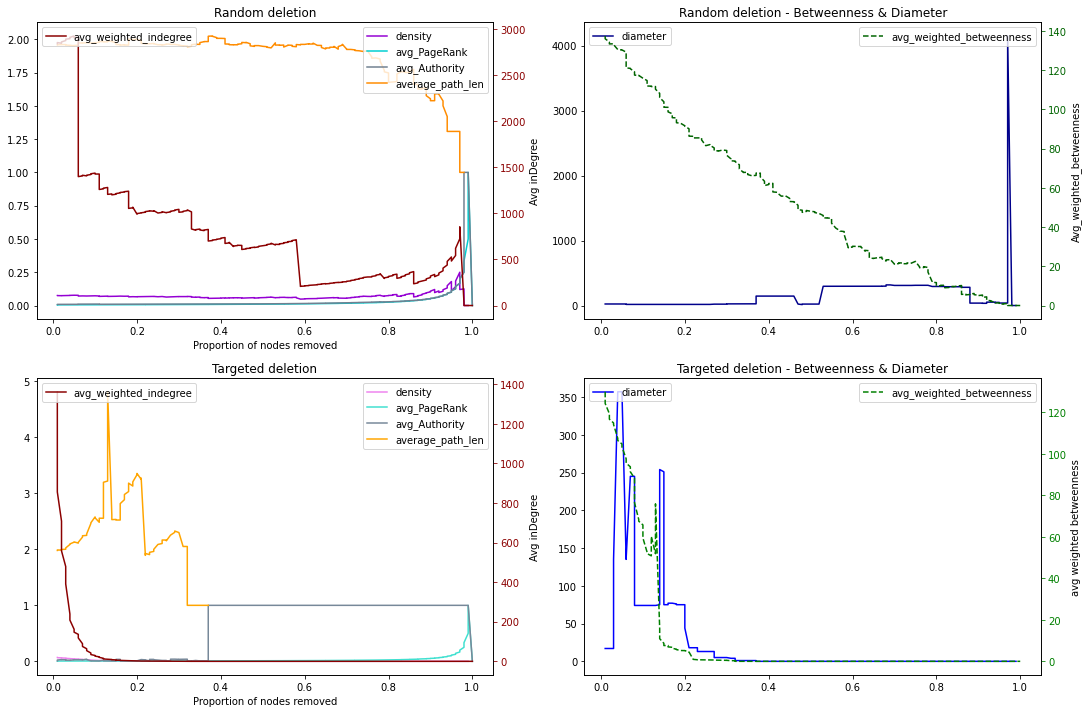

In [32]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(2,2,figsize=(18,12),sharey=False)

#Random attack LHS graphs

ax[0,1].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
ax[0,0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
#remove assortativity degree, replace with pagerank
ax[0,0].plot('prop_removed','avg_PageRank',data=df_type1_weighted,ls='-',color='darkturquoise')
#add in authority score
ax[0,0].plot('prop_removed','avg_Authority',data=df_type1_weighted,ls='-',color='slategray')
ax[0,0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('Proportion of nodes removed')
ax[0,0].set_title('Random deletion')

ax2_1 = ax[0,0].twinx()
ax2_1.plot('prop_removed','avg_weighted_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

#Random attack RHS Graphs - Betweenness & Diameter
ax[0,1].set_title('Random deletion - Betweenness & Diameter')
ax[0,1].legend(loc='upper left')

ax_bet_rand = ax[0,1].twinx()
ax_bet_rand.plot('prop_removed','avg_weighted_betweenness',data=df_type1_weighted,ls='--',color='darkgreen')
ax_bet_rand.tick_params('y',colors='darkgreen')
ax_bet_rand.set_ylabel('Avg_weighted_betweenness')
ax_bet_rand.legend(loc='upper right')


#Targeted attack LHS Graphs

ax[1,1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[1,0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
#remove assortativity degree, replace with pagerank
ax[1,0].plot('prop_removed','avg_PageRank',data=df_type2_weighted,ls='-',color='turquoise')
# add in Authority
ax[1,0].plot('prop_removed','avg_Authority',data=df_type2_weighted,ls='-',color='lightslategray')
ax[1,0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Proportion of nodes removed')
ax[1,0].set_title('Targeted deletion')

ax2_2 = ax[1,0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1,1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1,1].legend(loc='upper left')

ax_bet_tar = ax[1,1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()

## Attack on Edges

In [33]:
g.get_eid(3,4)

374

In [34]:
list(g.es)

[igraph.Edge(<igraph.Graph object at 0x7f88c0329e50>, 0, {'weight': 4.0}),
 igraph.Edge(<igraph.Graph object at 0x7f88c0329e50>, 1, {'weight': 2.0}),
 igraph.Edge(<igraph.Graph object at 0x7f88c0329e50>, 2, {'weight': 2.0}),
 igraph.Edge(<igraph.Graph object at 0x7f88c0329e50>, 3, {'weight': 1.0}),
 igraph.Edge(<igraph.Graph object at 0x7f88c0329e50>, 4, {'weight': 52.0}),
 igraph.Edge(<igraph.Graph object at 0x7f88c0329e50>, 5, {'weight': 82.0}),
 igraph.Edge(<igraph.Graph object at 0x7f88c0329e50>, 6, {'weight': 2.0}),
 igraph.Edge(<igraph.Graph object at 0x7f88c0329e50>, 7, {'weight': 0.5}),
 igraph.Edge(<igraph.Graph object at 0x7f88c0329e50>, 8, {'weight': 6.0}),
 igraph.Edge(<igraph.Graph object at 0x7f88c0329e50>, 9, {'weight': 18.0}),
 igraph.Edge(<igraph.Graph object at 0x7f88c0329e50>, 10, {'weight': 1.0}),
 igraph.Edge(<igraph.Graph object at 0x7f88c0329e50>, 11, {'weight': 1.0}),
 igraph.Edge(<igraph.Graph object at 0x7f88c0329e50>, 12, {'weight': 48.0}),
 igraph.Edge(<igra

In [35]:
#because the g.es only shows the edge ID, we need to get the vertex source and target
##sv = source vertex 
##st = source target 
sv = []
st = []
for edge in g.es:
    source_vertex_id = edge.source
    target_vertex_id = edge.target
    source_vertex = g.vs[source_vertex_id]
    sv.append(source_vertex)
    target_vertex = g.vs[target_vertex_id]
    st.append(target_vertex)



In [36]:
##get name of source vertices. sv and st each is an igraph object so need to slice them to get the names

sv_name = []
for i in range(len(sv)):
    name = sv[i]['name']
    sv_name.append(name)
    
st_name = []
for i in range(len(st)):
    target_name = st[i]['name']
    st_name.append(target_name)
    

In [37]:
## view to see if it works
st_name

['Bahamas',
 'British Virgin Islands',
 'United Kingdom',
 'United States',
 'Bahamas',
 'British Virgin Islands',
 'Cayman Islands',
 'Cook Islands',
 'Costa Rica',
 'Hong Kong',
 'Ireland',
 'Latvia',
 'Nevada',
 'Niue',
 'Panama',
 'Russia',
 'Samoa',
 'Seychelles',
 'United Kingdom',
 'Uruguay',
 'Bermuda',
 'British Virgin Islands',
 'China',
 'Barbados',
 'British Virgin Islands',
 'Canada',
 'Cayman Islands',
 'China',
 'Hong Kong',
 'Ireland',
 'Niue',
 'Panama',
 'Russia',
 'Saint Kitts and Nevis',
 'Samoa',
 'Seychelles',
 'United Kingdom',
 'United States',
 'Antigua and Barbuda',
 'Bahamas',
 'Barbados',
 'Belarus',
 'British Virgin Islands',
 'Canada',
 'Cayman Islands',
 'Costa Rica',
 'Hong Kong',
 'Ireland',
 'Nevada',
 'New Zealand',
 'Niue',
 'Panama',
 'Russia',
 'Saint Kitts and Nevis',
 'Seychelles',
 'Switzerland',
 'United Kingdom',
 'United States',
 'British Virgin Islands',
 'China',
 'Hong Kong',
 'Panama',
 'Russia',
 'United Kingdom',
 'United States',
 'Ba

In [38]:
st

[igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 4, {'name': 'United Kingdom'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 5, {'name': 'United States'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 7, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 8, {'name': 'Cook Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 9, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 10, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0329e50>, 11, {'name': 'Ireland'}),
 igraph.Vertex(<igraph.Graph object at 0x7f88c0

In [39]:
## new df with edges
edge_df = pd.DataFrame({'Edge_indice':g.es.indices,
                         'Edges_weight':g.es['weight'],
                         'Vertex_source':sv_name,
                         'Vertex_target':st_name})

In [40]:
##sort by descending weight
edge_df = edge_df.sort_values(by='Edges_weight',ascending=False)

In [41]:
edge_df.head(15)

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
1028,1028,65366.5,Hong Kong,British Virgin Islands
2351,2351,39766.5,Switzerland,British Virgin Islands
2369,2369,23216.0,Switzerland,Panama
1322,1322,21362.5,Jersey,British Virgin Islands
2395,2395,15735.0,Taiwan,British Virgin Islands
2643,2643,11652.0,United Kingdom,British Virgin Islands
2171,2171,11524.5,Singapore,British Virgin Islands
1514,1514,11169.0,Luxembourg,Panama
514,514,11138.0,China,British Virgin Islands
1852,1852,9789.5,Panama,British Virgin Islands


In [42]:
jersey_df = edge_df.loc[edge_df['Vertex_source']=='Jersey']

In [43]:
jersey_df.head(15)

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
1322,1322,21362.5,Jersey,British Virgin Islands
1337,1337,4272.0,Jersey,Panama
1317,1317,2488.0,Jersey,Bahamas
1336,1336,688.0,Jersey,Niue
1328,1328,181.0,Jersey,Hong Kong
1318,1318,88.0,Jersey,Barbados
1345,1345,60.0,Jersey,United Kingdom
1341,1341,43.0,Jersey,Seychelles
1330,1330,38.0,Jersey,Isle of Man
1340,1340,37.0,Jersey,Samoa


In [44]:
jersey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1322 to 1343
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Edge_indice    31 non-null     int64  
 1   Edges_weight   31 non-null     float64
 2   Vertex_source  31 non-null     object 
 3   Vertex_target  31 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


In [45]:
edge_deletelist = edge_df['Edge_indice'].tolist()

In [46]:
len(edge_deletelist)

2840

In [47]:
#Weighted on diameter
def Edges_weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    pr = []
    auth = []
    for i in range(len(g.es)):
        try:
            g.delete_edges(edge_deletelist[i])
        except:
            continue
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #try pagerank 
        page = g.pagerank(directed=True, weights='weight')
        page = sum(page)/max(len(page),1)
        pr.append(page)
        #authority score normalised by default
        kleinberg = g.authority_score(weights='weight')
        kleinberg = sum(kleinberg)/max(len(kleinberg),1)
        auth.append(kleinberg)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/len(edge_deletelist),2) #2840 is ttotal rows in df
        prop_removed.append(prop)
        node_removed.append(edge_deletelist[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
    return(df)

In [48]:
testtest= Edges_weighted_Type2_targeted_del(g)

In [49]:
testtest

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
0,1,0.0,1028,137.451807,23.5,-0.472317,2490.408163,0.073901,0.005102,0.009869,1.959011
1,2,0.0,2351,137.451807,23.5,-0.472256,2490.362245,0.073875,0.005102,0.009869,1.959077
2,3,0.0,2369,137.482774,23.5,-0.472133,2490.352041,0.073849,0.005102,0.009869,1.959143
3,4,0.0,1322,137.482774,23.5,-0.472036,2490.331633,0.073823,0.005102,0.009868,1.959209
4,5,0.0,2395,137.482774,23.5,-0.471962,2490.295918,0.073797,0.005102,0.009868,1.959275
...,...,...,...,...,...,...,...,...,...,...,...
1774,2828,1.0,884,173.490476,210.0,-0.432190,946.066327,0.027723,0.005102,0.006215,2.419191
1775,2831,1.0,854,173.495578,210.0,-0.433000,946.056122,0.027697,0.005102,0.006215,2.419275
1776,2832,1.0,532,173.495578,210.0,-0.432562,945.989796,0.027671,0.005102,0.006215,2.419856
1777,2834,1.0,87,173.495578,210.0,-0.431389,945.775510,0.027645,0.005102,0.006215,2.420686


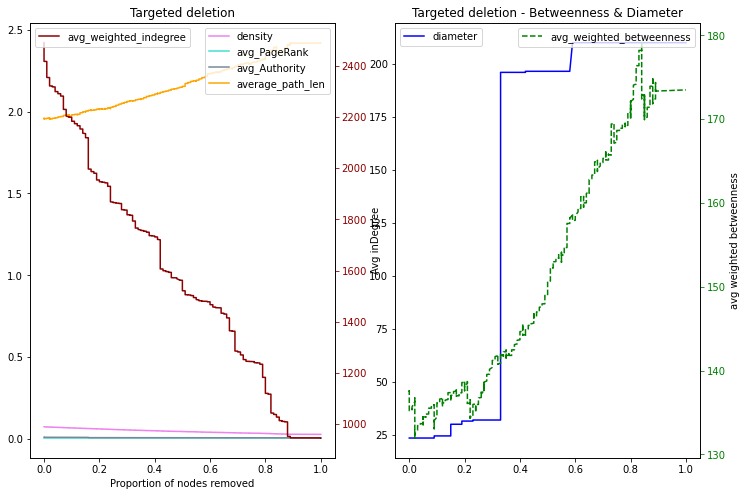

In [50]:
fig, ax = plt.subplots(1,2,figsize=(12,8),sharey=False)

#Targeted attack LHS Graphs

    
ax[0].plot('prop_removed','density',data=testtest,ls='-',color='violet')
#remove assortativity degree, replace with pagerank
ax[0].plot('prop_removed','avg_PageRank',data=testtest,ls='-',color='turquoise')
# add in Authority
ax[0].plot('prop_removed','avg_Authority',data=testtest,ls='-',color='lightslategray')
ax[0].plot('prop_removed','average_path_len',data=testtest,ls='-',color='orange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Targeted deletion')

ax2_2 = ax[0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=testtest,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1].plot('prop_removed','diameter',data=testtest,ls='-',color='blue')
ax[1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1].legend(loc='upper left')
    
    
ax_bet_tar = ax[1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=testtest,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()

### Edge chord diagram

In [51]:
## top 10 
top10 = pd.DataFrame({'source':edge_df['Vertex_source'],
                     'target':edge_df['Vertex_target'],
                     'weight':edge_df['Edges_weight']})

In [52]:
top10 = top10[:10]
top10

,source,target,weight
1028,Hong Kong,British Virgin Islands,65366.5
2351,Switzerland,British Virgin Islands,39766.5
2369,Switzerland,Panama,23216.0
1322,Jersey,British Virgin Islands,21362.5
2395,Taiwan,British Virgin Islands,15735.0
2643,United Kingdom,British Virgin Islands,11652.0
2171,Singapore,British Virgin Islands,11524.5
1514,Luxembourg,Panama,11169.0
514,China,British Virgin Islands,11138.0
1852,Panama,British Virgin Islands,9789.5


In [53]:
## recreate graph
g2 = ig.Graph.TupleList(top10.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})



In [54]:
# Define colors used for visualization
colors = ['blue', 'yellow', 'green','purple', 'pink', 'orange', 'lightcoral', 'plum', 'darkgreen', 'darkblue', 'rosybrown',
         'crimson', 'steelblue', 'khaki', 'moccasin', 'orangered', 'fuchsia', 'thistle', 'salmon', 'chocolate', 'lightseagreen',
         'springgreen', 'darkseagreen', 'deeppink', 'mediumvioletred','olive']

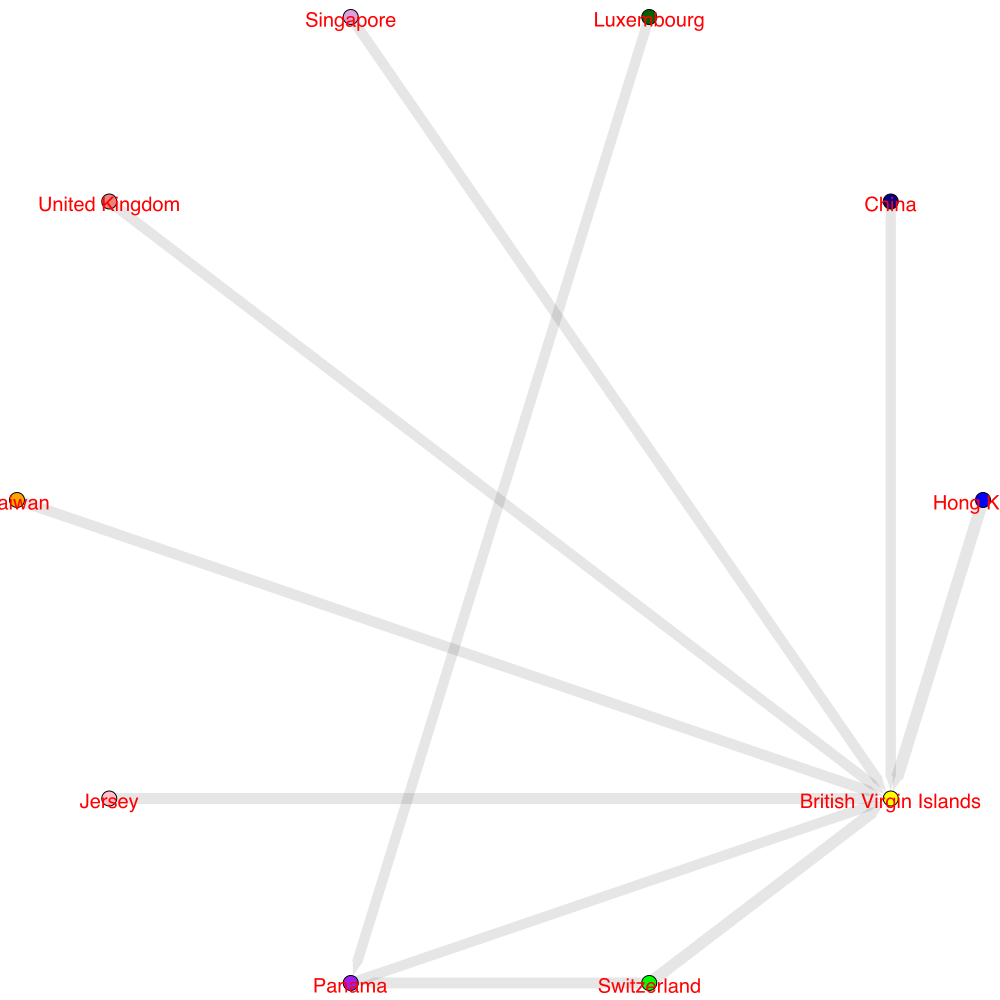

In [55]:
##plot chord 
#try top 10 by edge weight
visual_style = {}

vertex_colors = []

for i in range(len(top10)):
    vertex_colors.append(colors[i])
    
# Set bbox and margin
visual_style["bbox"] = (1000,1000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g2.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g2.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g2, 'top10_edge.png' ,vertex_label=g2.vs['name'], **visual_style)

### Pagerank

In [56]:
##try sort by indegree 
pagerank_temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'PageRank': g.pagerank(directed=True, weights='weight')})

In [57]:
#sort by descending 
pagerank_temp_df = pagerank_temp_df.sort_values(by='PageRank',ascending=False)

In [58]:
pagerank_temp_df

,Node_indice,Nodes,PageRank
3,3,British Virgin Islands,0.265045
15,15,Panama,0.127240
24,24,Barbados,0.080715
1,1,Bahamas,0.050056
10,10,Hong Kong,0.046778
...,...,...,...
106,106,Finland,0.000811
105,105,Fiji,0.000811
103,103,El Salvador,0.000811
102,102,Egypt,0.000811


In [59]:
pagerank_top10 = pagerank_temp_df[:10]

In [61]:
pagerank_top10

,Node_indice,Nodes,PageRank
3,3,British Virgin Islands,0.265045
15,15,Panama,0.127240
24,24,Barbados,0.080715
1,1,Bahamas,0.050056
10,10,Hong Kong,0.046778
4,4,United Kingdom,0.046458
18,18,Seychelles,0.037662
16,16,Russia,0.032252
14,14,Niue,0.028310
21,21,Bermuda,0.016432


In [89]:
edge_df.loc[edge_df['Edge_indice']==329]

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
329,329,290.0,British Virgin Islands,Bahamas


In [83]:
#v = g.vs[3]
hedges = g.incident(3)
hedges

[329,
 374,
 375,
 336,
 338,
 345,
 346,
 351,
 358,
 359,
 360,
 361,
 363,
 364,
 333,
 337,
 327,
 330,
 335,
 362,
 331,
 369,
 334,
 328,
 332,
 341,
 342,
 343,
 347,
 349,
 350,
 352,
 353,
 357,
 365,
 366,
 368,
 372,
 373,
 344,
 354,
 356,
 371,
 339,
 340,
 348,
 355,
 367,
 370]

In [87]:
g3 = ig.Graph.TupleList(pagerank_top10.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})

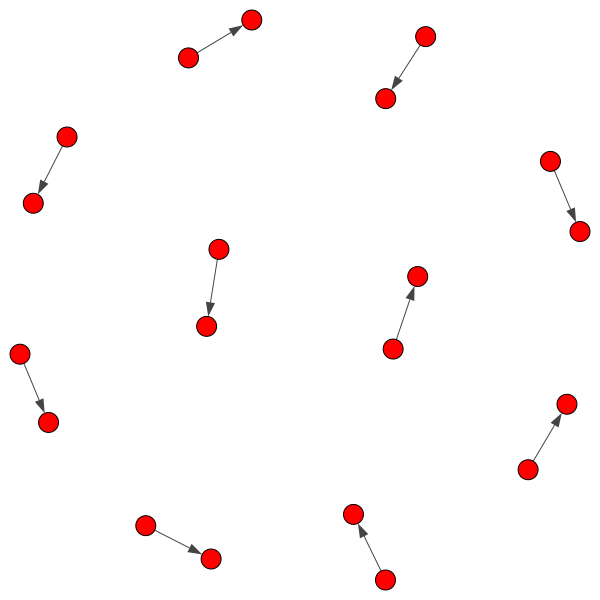

In [88]:
ig.plot(g3)

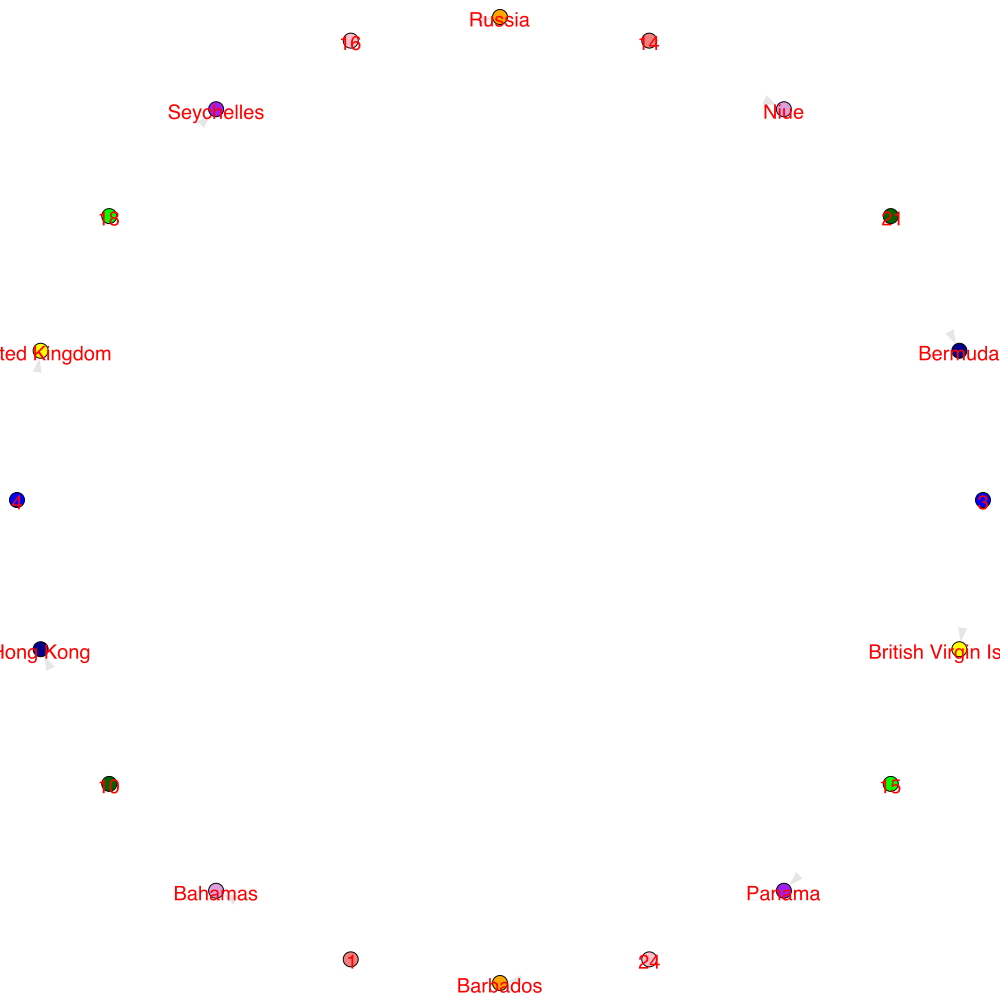

In [60]:
## recreate graph
g3 = ig.Graph.TupleList(pagerank_top10.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})


##plot chord 
#try top 10 by edge weight
visual_style = {}

vertex_colors = []

for i in range(len(pagerank_top10)):
    vertex_colors.append(colors[i])
    
# Set bbox and margin
visual_style["bbox"] = (1000,1000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g3.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g3.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g3, 'top10_pagerank.png' ,vertex_label=g3.vs['name'], **visual_style)